In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install librosa -q
import librosa

In [3]:
data, sr=librosa.load('/content/drive/MyDrive/Human Audio/Actor_05/03-01-01-01-01-01-05.wav')

In [4]:
data.shape

(79460,)

In [5]:
sr

22050

In [6]:
import librosa.display
import matplotlib.pyplot as plt

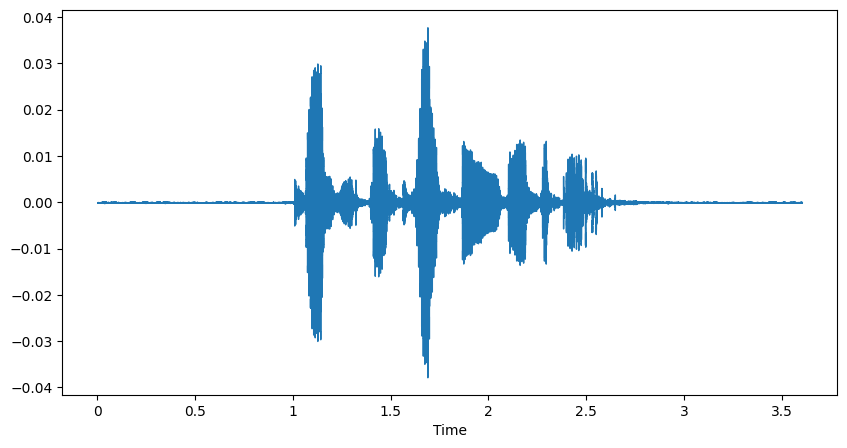

In [7]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(data, sr=sr)

In [8]:
from IPython.display import Audio

In [9]:
Audio(data,rate=sr)

Zero Crossing Rate is the rate at which signal changes sign from positive to negative and vice versa. Indicates the presence of noise or high frequencies in the signal. librosa.feature.zero_crossing_rate

In [10]:
zc=librosa.feature.zero_crossing_rate(data)

In [11]:
zc.shape

(1, 156)

Frequency Domain Features

1. Spectrogram

Visual Representation of freq with time. Shows how power of different frequency omponents change over time.

librosa.display.specshow()

2. Mel Spectrogram

Freq axis is converted into mel scale. It mimics human ear perception, emphasizes perceptually on relevant frequencies.

3. Chromagram represents energy of each pitch class in the audio. USeful for chord recognition and tonal analysis.

In [15]:
S=librosa.feature.melspectrogram(y=data,sr=sr)

In [17]:
import numpy as np
S_db=librosa.power_to_db(S, ref=np.max)

Text(0.5, 1.0, 'Mel Frequency Spectrogram')

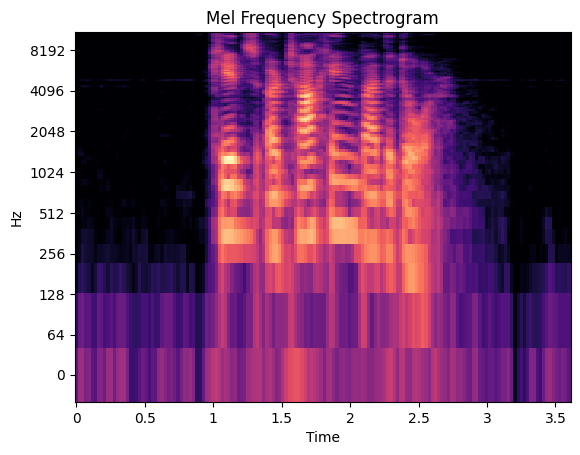

In [19]:
librosa.display.specshow(S_db,sr=sr,x_axis='time',y_axis='log')
plt.title('Mel Frequency Spectrogram')

In [20]:
C=librosa.feature.chroma_stft(y=data,sr=sr)

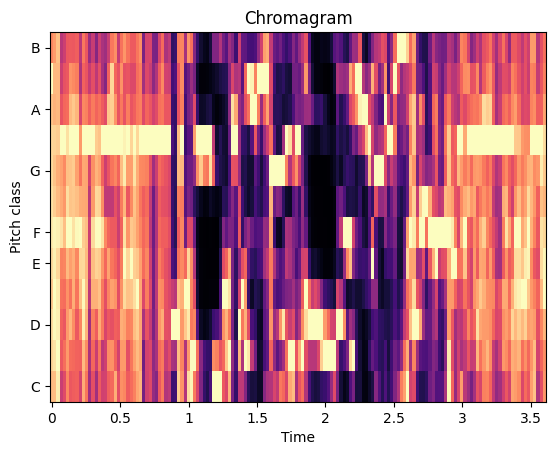

In [21]:
librosa.display.specshow(C,sr=sr,x_axis='time',y_axis='chroma')
plt.title('Chromagram')
plt.show()

Statistical Features

1. Spectral Centroid

centre of mass of a spectrum where bulk of energy is located. Associated with perceived brihtness of the sound. librosa.feature.spectral_centroid(data, sr)

2. Spectral Rolloff

Indicates shape of spectral distribution. librosa.feature.spectral_rolloff(data, sr)

3. Spectral Bandwidth
width of band of freq containing a specific percentage of total spectral energy. librosa.feature.spectral_bandwidth(data, sr)

MFCC Mel Frequency Cepstral Coefficients:

Short term power spectrum of sound.
Speech and Audio processing
librosa.feature.mfcc(data,sr,n_mfcc=3)

Tempo

Pace of sound (Beats per Minute)
librosa.beat.tempo(data,sr)

Beat

Points in time where events occour in audio signal.
librosa.beat.beat_track(data,sr)

In [28]:
mfcc=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=13)

In [29]:
mfcc

array([[-867.36224  , -861.36005  , -858.4914   , ..., -863.7813   ,
        -864.53723  , -865.3831   ],
       [   4.916721 ,   12.322586 ,   15.548304 , ...,    8.732977 ,
           8.439056 ,    7.7102413],
       [   4.9100676,   10.555336 ,   12.454073 , ...,    6.9390903,
           7.7821536,    7.687462 ],
       ...,
       [   4.701109 ,    8.139921 ,    9.445276 , ...,    7.6759076,
           7.570297 ,    6.984496 ],
       [   4.6564045,    7.297825 ,    7.692388 , ...,    6.120406 ,
           6.7663183,    6.837268 ],
       [   4.607847 ,    7.644347 ,    7.2752533, ...,    6.586145 ,
           6.8132353,    6.6786327]], dtype=float32)

In [33]:
tempo, beat_frames=librosa.beat.beat_track(y=data,sr=sr)

In [34]:
tempo

array([107.66601562])

In [35]:
beat_frames.shape

(3,)

In [36]:
beat_frames

array([45, 69, 92])